NOMOR 1 Load data

In [64]:
pip install tabulate

Defaulting to user installation because normal site-packages is not writeable

[notice] A new release of pip is available: 24.1.2 -> 24.2
[notice] To update, run: /Library/Developer/CommandLineTools/usr/bin/python3 -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [2]:
import pandas as pd 
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt
data = pd.read_csv('/Users/muhammadpandu/Documents/semester 2 Pandu/Ipsd/adult.csv')
data

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
48838,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
48839,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
48840,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


NOMOR 2 basic information about the dataset

In [3]:
# Mendeteksi outliers menggunakan IQR pada kolom 'age'
Q1 = data['age'].quantile(0.25)
Q3 = data['age'].quantile(0.75)
IQR = Q3 - Q1

batas_bawah = Q1 - 1.5 * IQR
batas_atas = Q3 + 1.5 * IQR

# Menampilkan data outliers
outliers = data[(data['age'] < batas_bawah) | (data['age'] > batas_atas)]
print("Outliers pada kolom 'age':")
outliers

# Jika ingin menghapus outliers:
# df = df[(df['age'] >= batas_bawah) & (df['age'] <= batas_atas)]


Outliers pada kolom 'age':


,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
193,79,?,48574,7th-8th,4,Widowed,?,Not-in-family,White,Male,0,0,40,United-States,<=50K
234,80,Self-emp-not-inc,201092,HS-grad,9,Married-civ-spouse,Other-service,Husband,White,Male,0,0,30,United-States,<=50K
899,90,Private,149069,Assoc-acdm,12,Married-civ-spouse,Sales,Husband,White,Male,0,1825,50,United-States,>50K
926,79,?,27457,Masters,14,Never-married,?,Not-in-family,White,Female,0,0,23,United-States,<=50K
951,80,Private,138050,HS-grad,9,Married-spouse-absent,Machine-op-inspct,Not-in-family,White,Female,0,0,16,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48558,90,Private,313749,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,25,United-States,<=50K
48648,90,Local-gov,214594,7th-8th,4,Married-civ-spouse,Protective-serv,Husband,White,Male,2653,0,40,United-States,<=50K
48740,85,Private,98611,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,3,Poland,<=50K
48775,82,?,403910,HS-grad,9,Never-married,?,Not-in-family,White,Male,0,0,3,United-States,<=50K


In [4]:
# Menghapus outliers 
df = data[(data['age'] >= batas_bawah) & (data['age'] <= batas_atas)]
df

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
48838,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
48839,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
48840,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [5]:
print("\nInformasi Dataset:")
df.head()


Informasi Dataset:


,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K


In [6]:
print("\nInformasi Dataset:")
df.info()



Informasi Dataset:
<class 'pandas.core.frame.DataFrame'>
Index: 48626 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              48626 non-null  int64 
 1   workclass        48626 non-null  object
 2   fnlwgt           48626 non-null  int64 
 3   education        48626 non-null  object
 4   educational-num  48626 non-null  int64 
 5   marital-status   48626 non-null  object
 6   occupation       48626 non-null  object
 7   relationship     48626 non-null  object
 8   race             48626 non-null  object
 9   gender           48626 non-null  object
 10  capital-gain     48626 non-null  int64 
 11  capital-loss     48626 non-null  int64 
 12  hours-per-week   48626 non-null  int64 
 13  native-country   48626 non-null  object
 14  income           48626 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.9+ MB


In [7]:
print("\nStatistik Deskriptif:")
print(df.describe())


Statistik Deskriptif:
                age        fnlwgt  educational-num  capital-gain  \
count  48626.000000  4.862600e+04     48626.000000  48626.000000   
mean      38.443631  1.898154e+05        10.081931   1076.534488   
std       13.404926  1.056570e+05         2.565011   7450.412818   
min       17.000000  1.228500e+04         1.000000      0.000000   
25%       28.000000  1.176060e+05         9.000000      0.000000   
50%       37.000000  1.783205e+05        10.000000      0.000000   
75%       47.000000  2.378110e+05        12.000000      0.000000   
max       78.000000  1.490400e+06        16.000000  99999.000000   

       capital-loss  hours-per-week  
count  48626.000000    48626.000000  
mean      87.337186       40.477995  
std      402.052656       12.339000  
min        0.000000        1.000000  
25%        0.000000       40.000000  
50%        0.000000       40.000000  
75%        0.000000       45.000000  
max     4356.000000       99.000000  


In [8]:
print("\nJumlah Missing Values per Kolom:")
print(df.isnull().sum())



Jumlah Missing Values per Kolom:
age                0
workclass          0
fnlwgt             0
education          0
educational-num    0
marital-status     0
occupation         0
relationship       0
race               0
gender             0
capital-gain       0
capital-loss       0
hours-per-week     0
native-country     0
income             0
dtype: int64


In [9]:
print("\nJumlah Nilai Unik per Kolom:")
print(df.nunique())


Jumlah Nilai Unik per Kolom:
age                   62
workclass              9
fnlwgt             28366
education             16
educational-num       16
marital-status         7
occupation            15
relationship           6
race                   5
gender                 2
capital-gain         123
capital-loss          99
hours-per-week        96
native-country        42
income                 2
dtype: int64


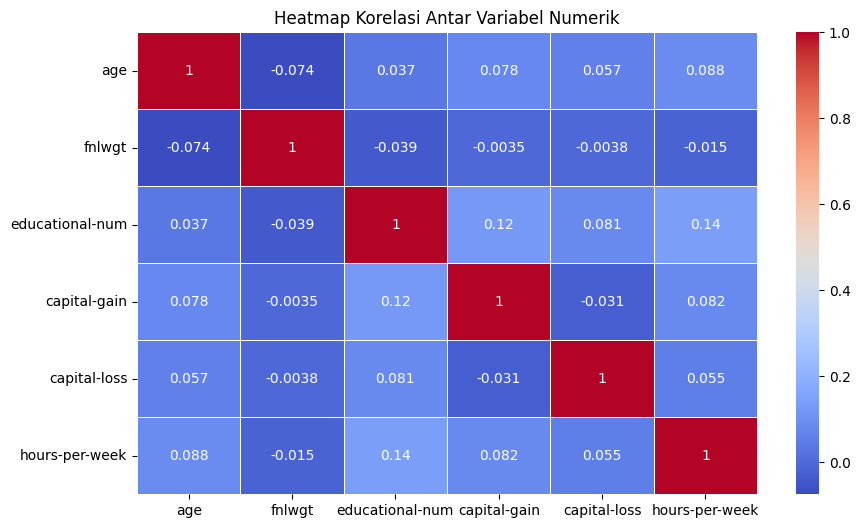

In [10]:
# Memilih hanya kolom numerik untuk perhitungan korelasi
numerical_df = df.select_dtypes(include=[np.number])

# Menampilkan korelasi antar variabel numerik (Heatmap)
plt.figure(figsize=(10,6))
sns.heatmap(numerical_df.corr(), annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Heatmap Korelasi Antar Variabel Numerik')
plt.show()


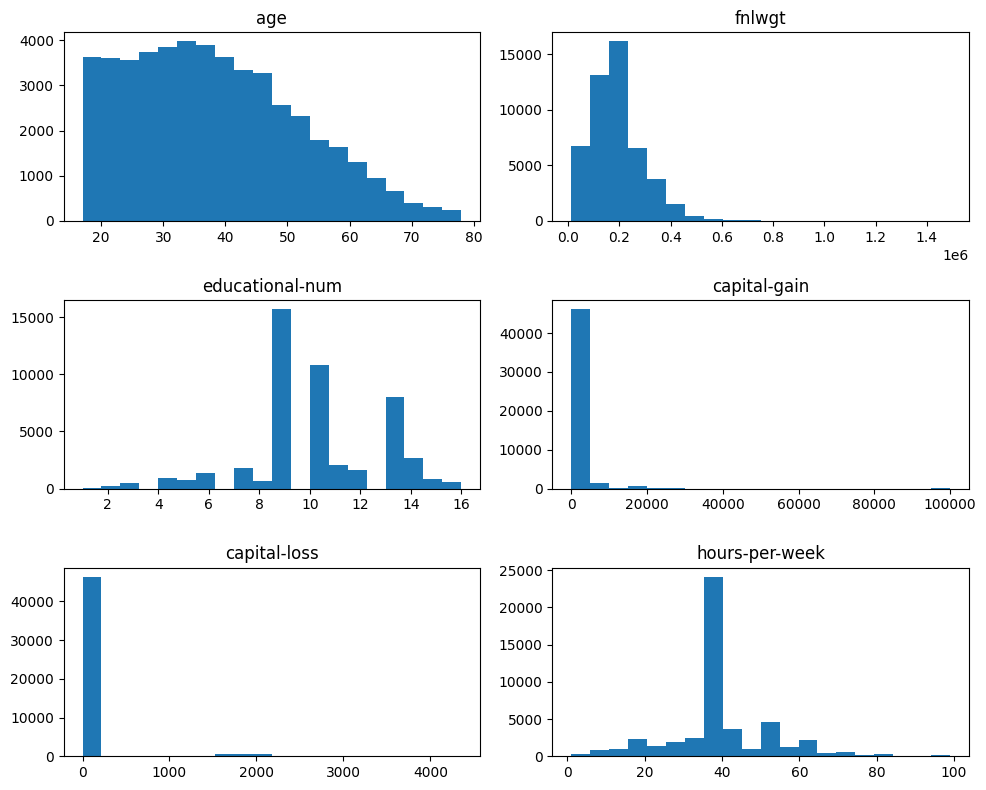

In [11]:
df.hist(bins=20, figsize=(10,8), grid=False)
plt.tight_layout()
plt.show()


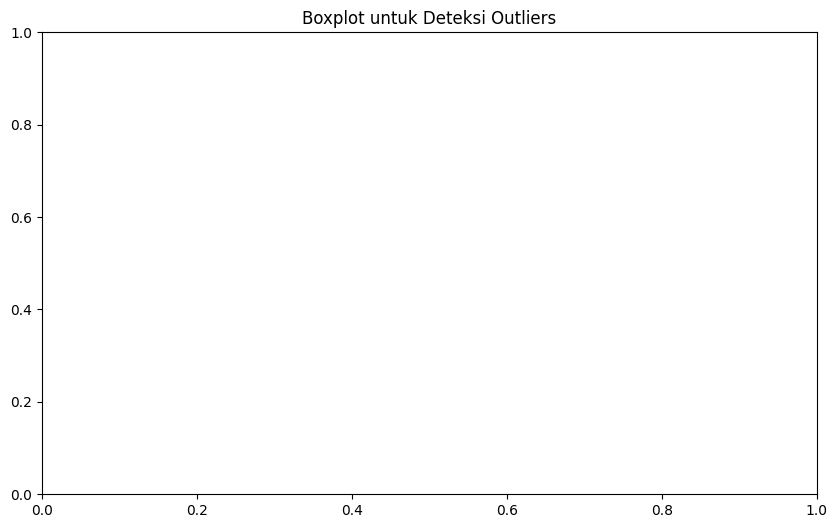

In [12]:
plt.figure(figsize=(10,6))
sns.boxplot(df=df)
plt.title('Boxplot untuk Deteksi Outliers')
plt.show()

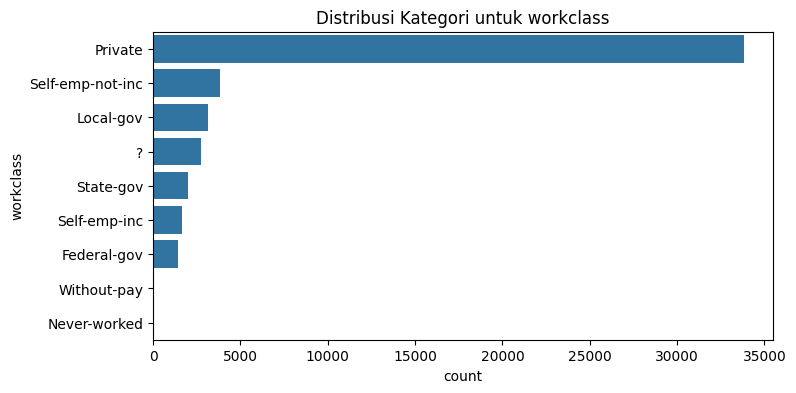

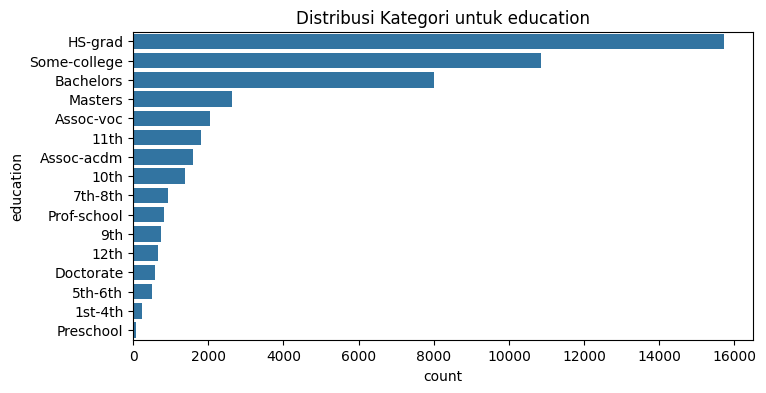

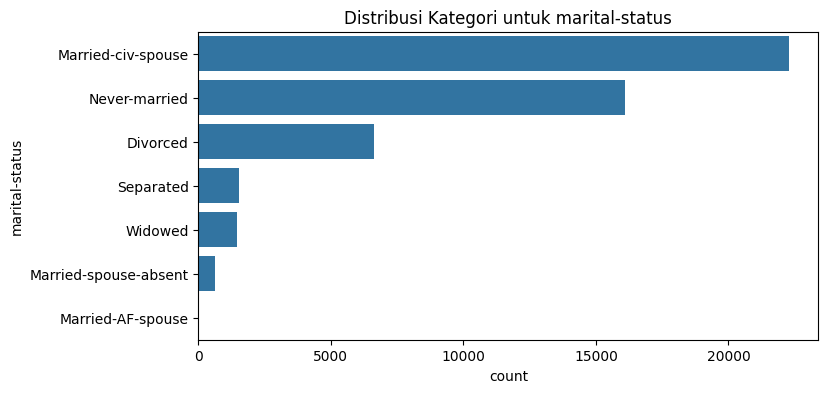

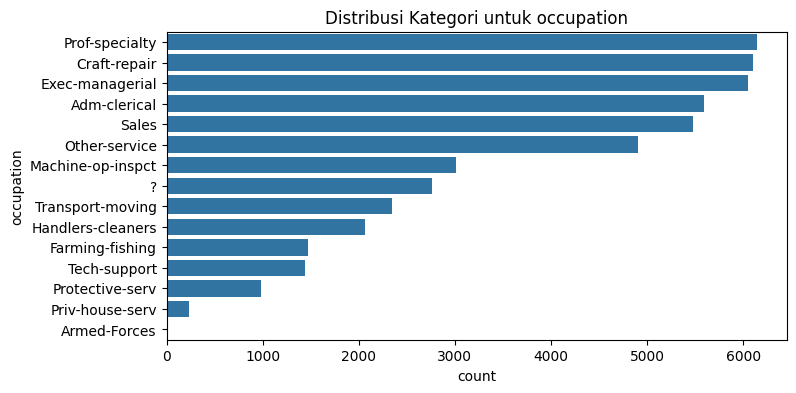

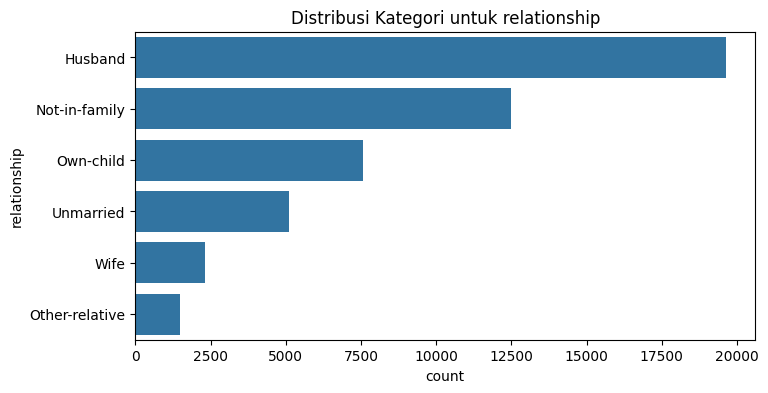

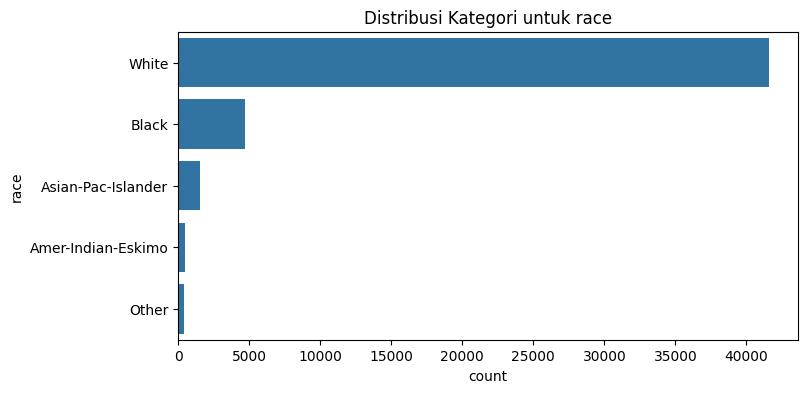

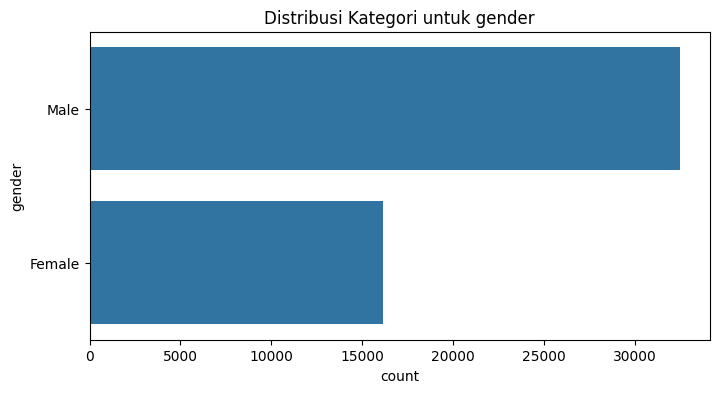

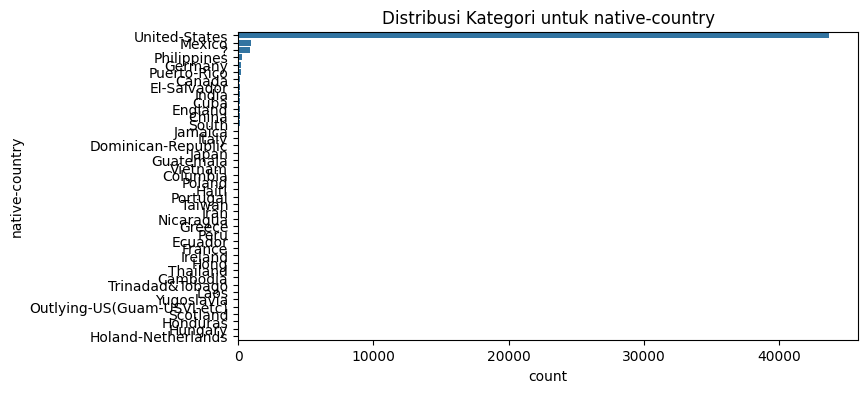

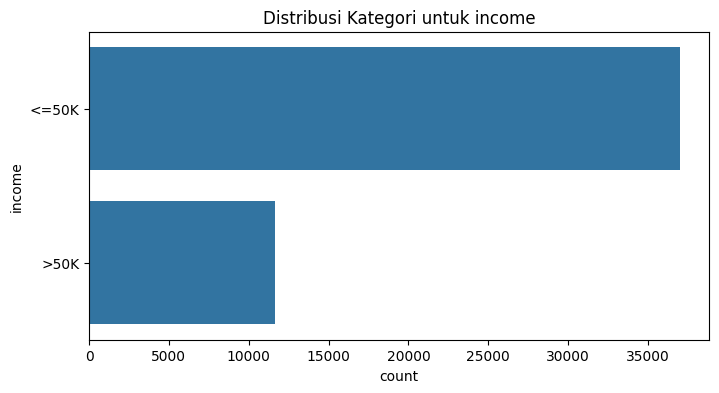

In [13]:
categorical_columns = df.select_dtypes(include=['object']).columns
for col in categorical_columns:
    plt.figure(figsize=(8,4))
    sns.countplot(y=df[col], order=df[col].value_counts().index)
    plt.title(f'Distribusi Kategori untuk {col}')
    plt.show()

NOMOR 3 Cek nilai duplikat, nilai unik

In [14]:
# Mengecek apakah ada baris duplikat
duplikat = df.duplicated()

# Menampilkan jumlah baris yang duplikat
print("Jumlah baris duplikat:", duplikat.sum())

# Jika ingin melihat baris mana yang duplikat, gunakan:
df_duplikat = df[data.duplicated()]
print("\nBaris yang duplikat:")
df_duplikat


Jumlah baris duplikat: 51

Baris yang duplikat:


/var/folders/c9/hc0ty_1x5m32c7wkk1tjlp4r0000gn/T/ipykernel_1160/2584540420.py:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_duplikat = df[data.duplicated()]


,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
864,24,Private,194630,Bachelors,13,Never-married,Prof-specialty,Not-in-family,White,Male,0,0,35,United-States,<=50K
11189,37,Private,52870,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,40,United-States,<=50K
11212,29,Private,36440,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Female,0,0,40,United-States,<=50K
13848,30,Private,180317,Assoc-voc,11,Divorced,Machine-op-inspct,Not-in-family,White,Male,0,0,40,United-States,<=50K
15960,18,Self-emp-inc,378036,12th,8,Never-married,Farming-fishing,Own-child,White,Male,0,0,10,United-States,<=50K
18476,39,Private,184659,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,<=50K
19399,19,Private,130431,5th-6th,3,Never-married,Farming-fishing,Not-in-family,White,Male,0,0,36,Mexico,<=50K
19726,41,Private,116391,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,40,United-States,>50K
20606,25,Private,308144,Bachelors,13,Never-married,Craft-repair,Not-in-family,White,Male,0,0,40,Mexico,<=50K
21162,25,Private,308144,Bachelors,13,Never-married,Craft-repair,Not-in-family,White,Male,0,0,40,Mexico,<=50K


In [15]:
df2 = df.drop_duplicates()
df2

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
48838,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
48839,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
48840,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [57]:
data_UNik = df2.nunique()
data_UNik

age                   62
workclass              9
fnlwgt             28366
education             16
educational-num       16
marital-status         7
occupation            15
relationship           6
race                   5
gender                 2
capital-gain         123
capital-loss          99
hours-per-week        96
native-country        42
income                 2
dtype: int64

NOMOR 4 Visualisasikan jumlah nilai unik

/var/folders/c9/hc0ty_1x5m32c7wkk1tjlp4r0000gn/T/ipykernel_1878/4012505865.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=data_UNik.index, y=data_UNik.values, palette="viridis")


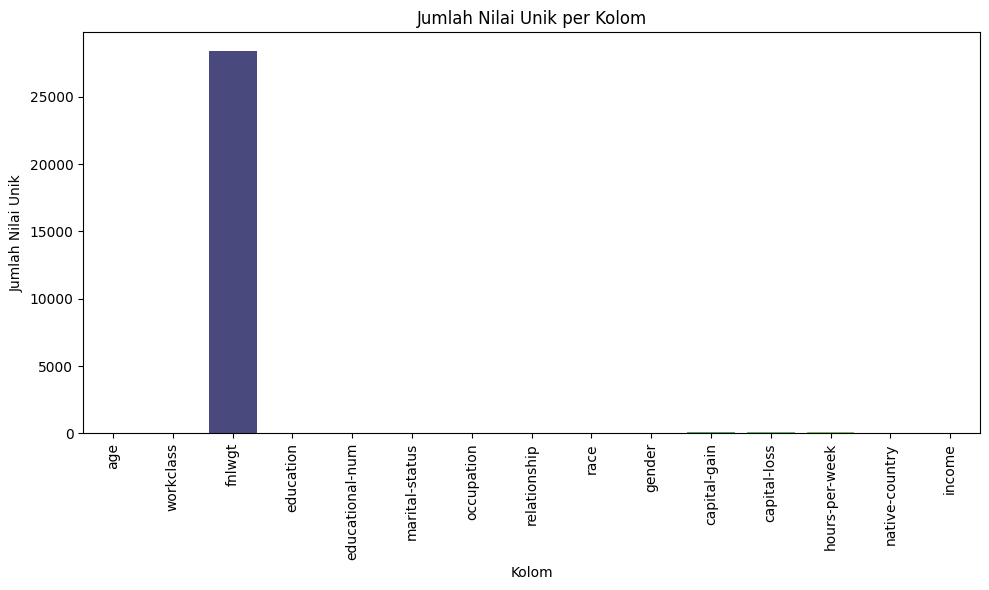

In [58]:
plt.figure(figsize=(10,6))
sns.barplot(x=data_UNik.index, y=data_UNik.values, palette="viridis")
plt.xticks(rotation=90)  # Memutar label di sumbu X jika terlalu panjang
plt.title('Jumlah Nilai Unik per Kolom')
plt.ylabel('Jumlah Nilai Unik')
plt.xlabel('Kolom')
plt.tight_layout()
plt.show()

NOMOR 5  Menemukan null values

In [37]:
# Menemukan jumlah missing values di setiap kolom
missing_values = data.isnull().sum()
missing_values



age                0
workclass          0
fnlwgt             0
education          0
educational-num    0
marital-status     0
occupation         0
relationship       0
race               0
gender             0
capital-gain       0
capital-loss       0
hours-per-week     0
native-country     0
income             0
dtype: int64

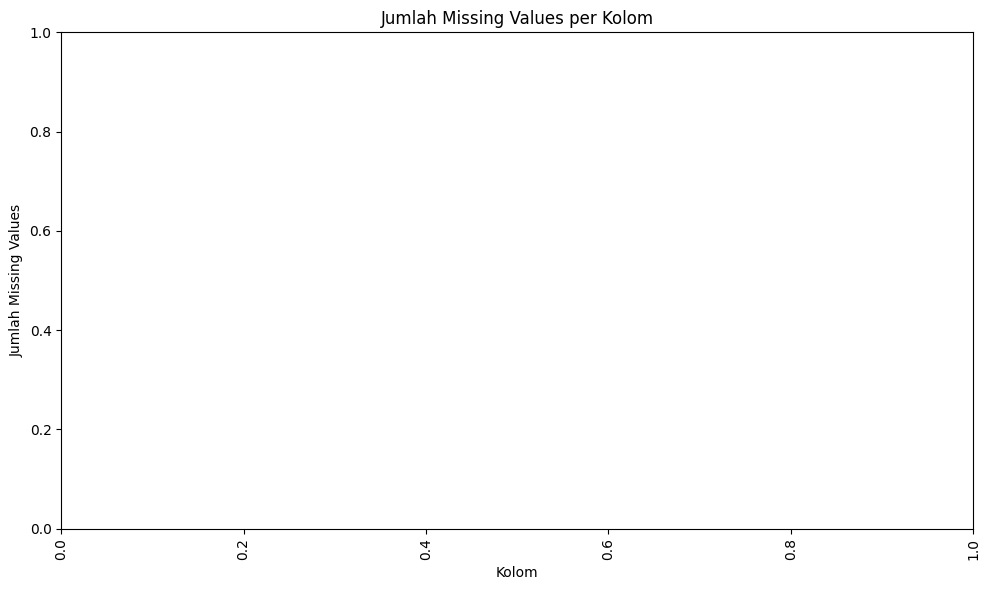

In [59]:
# Menghitung jumlah missing values per kolom dan memfilternya jika ada nilai null
missing_values = df2.isnull().sum()
missing_values = missing_values[missing_values > 0]

# Visualisasi dengan bar plot
plt.figure(figsize=(10,6))
sns.barplot(x=missing_values.index, y=missing_values.values, palette="magma")
plt.xticks(rotation=90)  # Memutar label di sumbu X jika terlalu panjang
plt.title('Jumlah Missing Values per Kolom')
plt.ylabel('Jumlah Missing Values')
plt.xlabel('Kolom')
plt.tight_layout()
plt.show()


NO. 6 replace semua null values
karena data saya tidak ada yang null values, saya hanya memberikan contoh codingannya


In [30]:
data_cleaned = df2.fillna(0)

# Menampilkan data yang telah diubah
data_cleaned

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25.0,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38.0,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28.0,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44.0,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18.0,0,103497,Some-college,10,Never-married,0,Own-child,White,Female,0,0,30,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,27.0,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
48838,40.0,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
48839,58.0,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
48840,22.0,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [42]:
import pandas as pd
import numpy as np

# Mengganti '?' dengan NaN
data_cleaned.replace('?', np.nan , inplace=True)
data_cleaned


,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25.0,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38.0,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28.0,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44.0,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18.0,0,103497,Some-college,10,Never-married,0,Own-child,White,Female,0,0,30,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,27.0,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
48838,40.0,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
48839,58.0,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
48840,22.0,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [43]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# Mengganti '?' dengan NaN
data_cleaned.replace('?', np.nan, inplace=True)

# Memeriksa jumlah nilai yang hilang
print(data_cleaned.isnull().sum())

# Mengisi missing values untuk kolom kategorikal dengan modus
for column in data_cleaned.select_dtypes(include=['object']).columns:
    data_cleaned[column].fillna(data_cleaned[column].mode()[0], inplace=True)

# Mengisi missing values untuk kolom numerik dengan rata-rata
for column in data_cleaned.select_dtypes(include=['float64', 'int64']).columns:
    data_cleaned[column].fillna(data_cleaned[column].mean(), inplace=True)

# Memeriksa kembali apakah ada nilai yang hilang
print(data_cleaned.isnull().sum())


age                0
workclass          0
fnlwgt             0
education          0
educational-num    0
marital-status     0
occupation         0
relationship       0
race               0
gender             0
capital-gain       0
capital-loss       0
hours-per-week     0
native-country     0
income             0
dtype: int64
age                0
workclass          0
fnlwgt             0
education          0
educational-num    0
marital-status     0
occupation         0
relationship       0
race               0
gender             0
capital-gain       0
capital-loss       0
hours-per-week     0
native-country     0
income             0
dtype: int64


/var/folders/c9/hc0ty_1x5m32c7wkk1tjlp4r0000gn/T/ipykernel_1160/3989406175.py:16: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data_cleaned[column].fillna(data_cleaned[column].mode()[0], inplace=True)
/var/folders/c9/hc0ty_1x5m32c7wkk1tjlp4r0000gn/T/ipykernel_1160/3989406175.py:20: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which w

In [45]:
data_cleaned

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25.0,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38.0,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28.0,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44.0,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18.0,0,103497,Some-college,10,Never-married,0,Own-child,White,Female,0,0,30,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,27.0,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
48838,40.0,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
48839,58.0,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
48840,22.0,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [62]:
data_cleaned = data_cleaned.replace('?', pd.NA)

# Fill numeric columns with median
numeric_columns = ['age', 'fnlwgt', 'educational-num', 'capital-gain', 'capital-loss', 'hours-per-week']
for col in numeric_columns:
    data_cleaned[col] = pd.to_numeric(data_cleaned[col], errors='coerce')
    data_cleaned[col] = data_cleaned[col].fillna(data_cleaned[col].median())

# Fill categorical columns with mode
categorical_columns = ['workclass', 'education', 'marital-status', 'occupation', 'relationship', 'race', 'gender', 'native-country', 'income']
for col in categorical_columns:
    data_cleaned[col] = data_cleaned[col].fillna(data_cleaned[col].mode()[0])

print(data_cleaned.head())
print("\nDataFrame Info:")
print(data_cleaned.info())

    age  workclass  fnlwgt     education  educational-num      marital-status  \
0  25.0    Private  226802          11th                7       Never-married   
1  38.0    Private   89814       HS-grad                9  Married-civ-spouse   
2  28.0  Local-gov  336951    Assoc-acdm               12  Married-civ-spouse   
3  44.0    Private  160323  Some-college               10  Married-civ-spouse   
4  18.0          0  103497  Some-college               10       Never-married   

          occupation relationship   race  gender  capital-gain  capital-loss  \
0  Machine-op-inspct    Own-child  Black    Male             0             0   
1    Farming-fishing      Husband  White    Male             0             0   
2    Protective-serv      Husband  White    Male             0             0   
3  Machine-op-inspct      Husband  Black    Male          7688             0   
4                  0    Own-child  White  Female             0             0   

   hours-per-week native-country

In [63]:
data_cleaned = data_cleaned.replace('?', pd.NA)

# Fill numeric columns with median
numeric_columns = ['age', 'fnlwgt', 'educational-num', 'capital-gain', 'capital-loss', 'hours-per-week']
for col in numeric_columns:
    data_cleaned[col] = pd.to_numeric(data_cleaned[col], errors='coerce')
    data_cleaned[col] = data_cleaned[col].fillna(data_cleaned[col].median())

# Fill categorical columns with mode
categorical_columns = ['workclass', 'education', 'marital-status', 'occupation', 'relationship', 'race', 'gender', 'native-country', 'income']
for col in categorical_columns:
    data_cleaned[col] = data_cleaned[col].fillna(data_cleaned[col].mode()[0])

# Function to display data in a structured format
def display_structured_data(df, num_rows=10):
    print("\nStructured Data:")
    print(tabulate(df.head(num_rows), headers='keys', tablefmt='pretty', showindex=False))
    
    print("\nDataFrame Info:")
    print(df.info())
    
    print("\nSummary Statistics:")
    print(df.describe().to_string())
    
    print("\nMissing Values:")
    print(df.isnull().sum())

# Display the structured data
display_structured_data(data_cleaned)


Structured Data:


NameError: name 'tabulate' is not defined

In [65]:
import pandas as pd
import io

# Coba impor tabulate, jika tidak ada, gunakan None
try:
    from tabulate import tabulate
except ImportError:
    tabulate = None

# The raw data string
data = """age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K
27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K
52,Self-emp-inc,287927,HS-grad,9,Married-civ-spouse,Exec-managerial,Wife,White,Female,15024,0,40,United-States,>50K"""

# Read the data into a DataFrame
data_cleaned = pd.read_csv(io.StringIO(data))

# Replace '?' with NaN
data_cleaned = data_cleaned.replace('?', pd.NA)

# Fill numeric columns with median
numeric_columns = ['age', 'fnlwgt', 'educational-num', 'capital-gain', 'capital-loss', 'hours-per-week']
for col in numeric_columns:
    data_cleaned[col] = pd.to_numeric(data_cleaned[col], errors='coerce')
    data_cleaned[col] = data_cleaned[col].fillna(data_cleaned[col].median())

# Fill categorical columns with mode
categorical_columns = ['workclass', 'education', 'marital-status', 'occupation', 'relationship', 'race', 'gender', 'native-country', 'income']
for col in categorical_columns:
    data_cleaned[col] = data_cleaned[col].fillna(data_cleaned[col].mode()[0])

# Function to display data in a structured format
def display_structured_data(df, num_rows=10):
    print("\nStructured Data:")
    if tabulate:
        print(tabulate(df.head(num_rows), headers='keys', tablefmt='pretty', showindex=False))
    else:
        print(df.head(num_rows).to_string(index=False))
    
    print("\nDataFrame Info:")
    print(df.info())
    
    print("\nSummary Statistics:")
    print(df.describe().to_string())
    
    print("\nMissing Values:")
    print(df.isnull().sum())

# Display the structured data
display_structured_data(data_cleaned)


Structured Data:
+-----+--------------+--------+--------------+-----------------+--------------------+-------------------+--------------+-------+--------+--------------+--------------+----------------+----------------+--------+
| age |  workclass   | fnlwgt |  education   | educational-num |   marital-status   |    occupation     | relationship | race  | gender | capital-gain | capital-loss | hours-per-week | native-country | income |
+-----+--------------+--------+--------------+-----------------+--------------------+-------------------+--------------+-------+--------+--------------+--------------+----------------+----------------+--------+
| 25  |   Private    | 226802 |     11th     |        7        |   Never-married    | Machine-op-inspct |  Own-child   | Black |  Male  |      0       |      0       |       40       | United-States  | <=50K  |
| 38  |   Private    | 89814  |   HS-grad    |        9        | Married-civ-spouse |  Farming-fishing  |   Husband    | White |  Male  | 

NOMOR 7 Mengetahui tipe data dari dataset yang sedang diekplorasi untuk mempermudah proses

In [47]:
# Menampilkan informasi tentang dataset
print(data_cleaned.info())


<class 'pandas.core.frame.DataFrame'>
Index: 48575 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   age              48575 non-null  float64
 1   workclass        48575 non-null  object 
 2   fnlwgt           48575 non-null  int64  
 3   education        48575 non-null  object 
 4   educational-num  48575 non-null  int64  
 5   marital-status   48575 non-null  object 
 6   occupation       48575 non-null  object 
 7   relationship     48575 non-null  object 
 8   race             48575 non-null  object 
 9   gender           48575 non-null  object 
 10  capital-gain     48575 non-null  int64  
 11  capital-loss     48575 non-null  int64  
 12  hours-per-week   48575 non-null  int64  
 13  native-country   48575 non-null  object 
 14  income           48575 non-null  object 
dtypes: float64(1), int64(5), object(9)
memory usage: 5.9+ MB
None


In [46]:
# Menampilkan tipe data dari setiap kolom
print(data_cleaned.dtypes)


age                float64
workclass           object
fnlwgt               int64
education           object
educational-num      int64
marital-status      object
occupation          object
relationship        object
race                object
gender              object
capital-gain         int64
capital-loss         int64
hours-per-week       int64
native-country      object
income              object
dtype: object


/var/folders/c9/hc0ty_1x5m32c7wkk1tjlp4r0000gn/T/ipykernel_1160/1652102323.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=data_types.index.astype(str), y=data_types.values, palette="coolwarm")


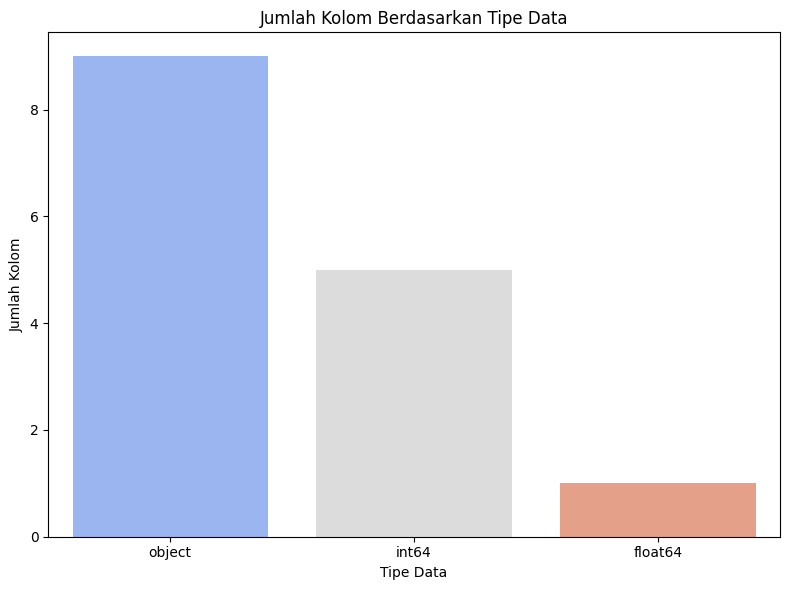

In [48]:
# Menghitung jumlah kolom berdasarkan tipe data
data_types = data_cleaned.dtypes.value_counts()

# Visualisasi dengan bar plot
plt.figure(figsize=(8,6))
sns.barplot(x=data_types.index.astype(str), y=data_types.values, palette="coolwarm")
plt.title('Jumlah Kolom Berdasarkan Tipe Data')
plt.ylabel('Jumlah Kolom')
plt.xlabel('Tipe Data')
plt.tight_layout()
plt.show()


NO. 8 Filter data

In [49]:


# Filter data untuk gender 'Male' dan income '>50K'
filtered_data = data_cleaned[(data_cleaned['gender'] == 'Male') & (data_cleaned['income'] == '>50K')]

# Menampilkan hasil filter
filtered_data


,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
2,28.0,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44.0,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
7,63.0,Self-emp-not-inc,104626,Prof-school,15,Married-civ-spouse,Prof-specialty,Husband,White,Male,3103,0,32,United-States,>50K
10,65.0,Private,184454,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,6418,0,40,United-States,>50K
14,48.0,Private,279724,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,3103,0,48,United-States,>50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48813,34.0,Private,204461,Doctorate,16,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,60,United-States,>50K
48814,54.0,Private,337992,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,Asian-Pac-Islander,Male,0,0,50,Japan,>50K
48820,71.0,0,287372,Doctorate,16,Married-civ-spouse,0,Husband,White,Male,0,0,10,United-States,>50K
48835,53.0,Private,321865,Masters,14,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,40,United-States,>50K


In [50]:
filtered_data2 = data_cleaned[(data_cleaned['age'] > 30) & (data_cleaned['hours-per-week'] > 40)]
filtered_data2


,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
1,38.0,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
14,48.0,Private,279724,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,3103,0,48,United-States,>50K
15,43.0,Private,346189,Masters,14,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,50,United-States,>50K
19,40.0,Private,85019,Doctorate,16,Married-civ-spouse,Prof-specialty,Husband,Asian-Pac-Islander,Male,0,0,45,0,>50K
20,34.0,Private,107914,Bachelors,13,Married-civ-spouse,Tech-support,Husband,White,Male,0,0,47,United-States,>50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48819,38.0,Private,139180,Bachelors,13,Divorced,Prof-specialty,Unmarried,Black,Female,15020,0,45,United-States,>50K
48824,45.0,Local-gov,119199,Assoc-acdm,12,Divorced,Prof-specialty,Unmarried,White,Female,0,0,48,United-States,<=50K
48829,65.0,Self-emp-not-inc,99359,Prof-school,15,Never-married,Prof-specialty,Not-in-family,White,Male,1086,0,60,United-States,<=50K
48831,43.0,Self-emp-not-inc,27242,Some-college,10,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,50,United-States,<=50K


In [51]:

# Filter data berdasarkan workclass 'Private', education 'Bachelors', dan hours-per-week > 40
filtered_data3 = data_cleaned[(data_cleaned['workclass'] == 'Private') & 
                     (data_cleaned['education'] == "Bachelors") & 
                     (data_cleaned['hours-per-week'] > 40)]

# Menampilkan hasil filter
filtered_data3

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
20,34.0,Private,107914,Bachelors,13,Married-civ-spouse,Tech-support,Husband,White,Male,0,0,47,United-States,>50K
23,25.0,Private,220931,Bachelors,13,Never-married,Prof-specialty,Not-in-family,White,Male,0,0,43,Peru,<=50K
60,30.0,Private,101135,Bachelors,13,Never-married,Exec-managerial,Not-in-family,White,Female,0,0,50,United-States,<=50K
148,55.0,Private,124771,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,15024,0,50,United-States,>50K
183,37.0,Private,203079,Bachelors,13,Widowed,Exec-managerial,Not-in-family,White,Female,0,0,55,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48705,35.0,Private,102268,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,45,United-States,<=50K
48739,36.0,Private,237943,Bachelors,13,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,1977,45,United-States,>50K
48814,54.0,Private,337992,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,Asian-Pac-Islander,Male,0,0,50,Japan,>50K
48817,34.0,Private,160216,Bachelors,13,Never-married,Exec-managerial,Not-in-family,White,Female,0,0,55,United-States,>50K


NO. 9 create a box plot

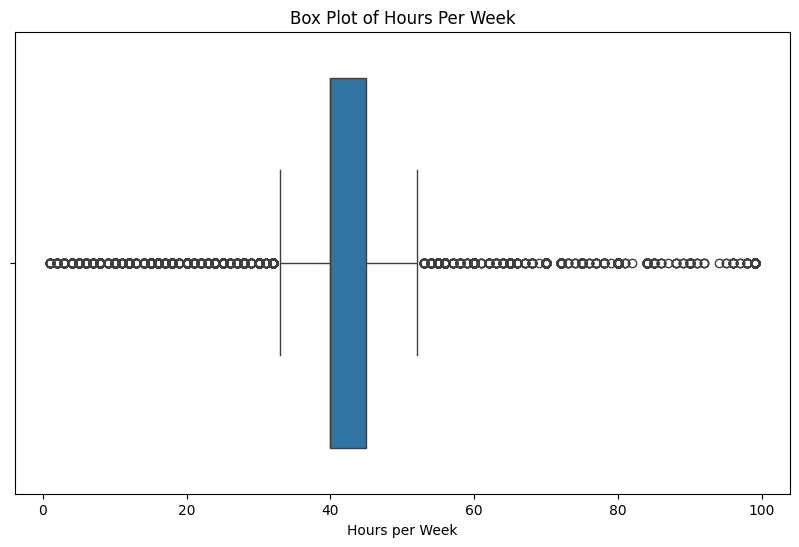

In [52]:
# Membuat box plot untuk kolom 'hours-per-week'
plt.figure(figsize=(10, 6))
sns.boxplot(x=data_cleaned['hours-per-week'])

# Menambahkan judul dan label
plt.title('Box Plot of Hours Per Week')
plt.xlabel('Hours per Week')

# Menampilkan plot
plt.show()

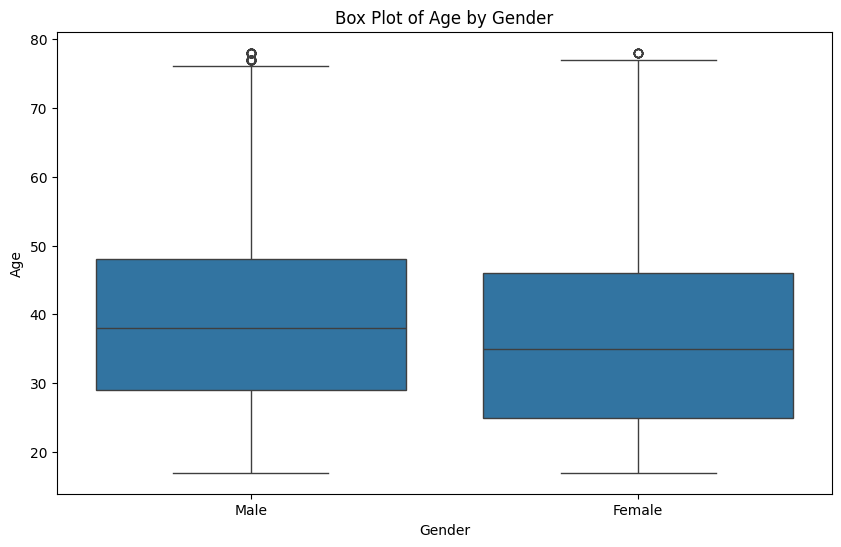

In [53]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='gender', y='age', data=data_cleaned)

# Menambahkan judul dan label
plt.title('Box Plot of Age by Gender')
plt.xlabel('Gender')
plt.ylabel('Age')

# Menampilkan plot
plt.show()

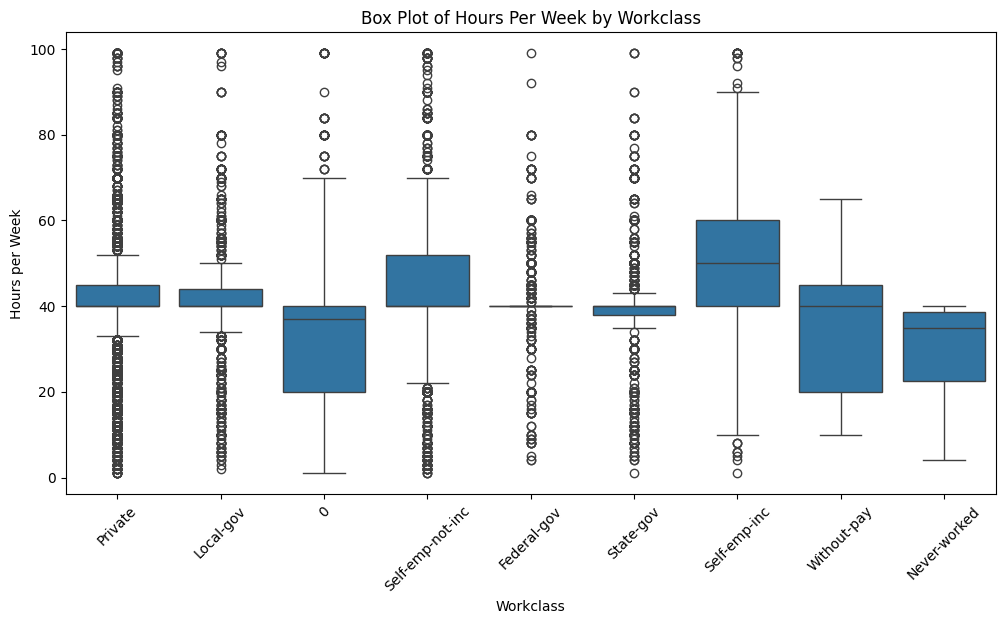

In [56]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='workclass', y='hours-per-week', data=data_cleaned)

# Menambahkan judul dan label
plt.title('Box Plot of Hours Per Week by Workclass')
plt.xlabel('Workclass')
plt.ylabel('Hours per Week')

# Memutar label di sumbu X agar lebih mudah dibaca
plt.xticks(rotation=45)

# Menampilkan plot
plt.show()

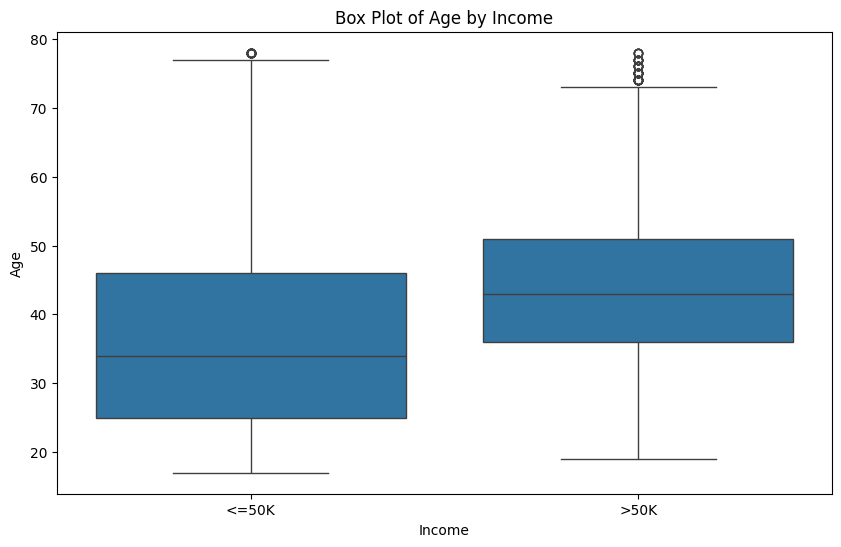

In [57]:
# Membuat box plot untuk 'age' berdasarkan 'income'
plt.figure(figsize=(10, 6))
sns.boxplot(x='income', y='age', data=data_cleaned)

# Menambahkan judul dan label
plt.title('Box Plot of Age by Income')
plt.xlabel('Income')
plt.ylabel('Age')

# Menampilkan plot
plt.show()


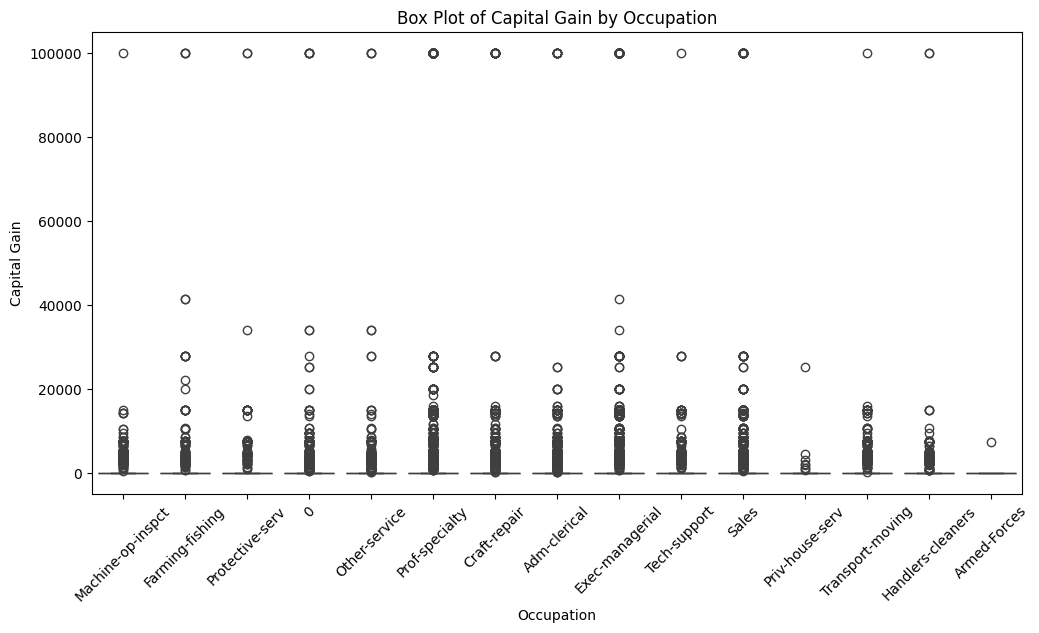

In [58]:

# Membuat box plot untuk 'capital-gain' berdasarkan 'occupation'
plt.figure(figsize=(12, 6))
sns.boxplot(x='occupation', y='capital-gain', data=data_cleaned)

# Menambahkan judul dan label
plt.title('Box Plot of Capital Gain by Occupation')
plt.xlabel('Occupation')
plt.ylabel('Capital Gain')

# Memutar label di sumbu X agar lebih mudah dibaca
plt.xticks(rotation=45)

# Menampilkan plot
plt.show()

NO.10 correlation

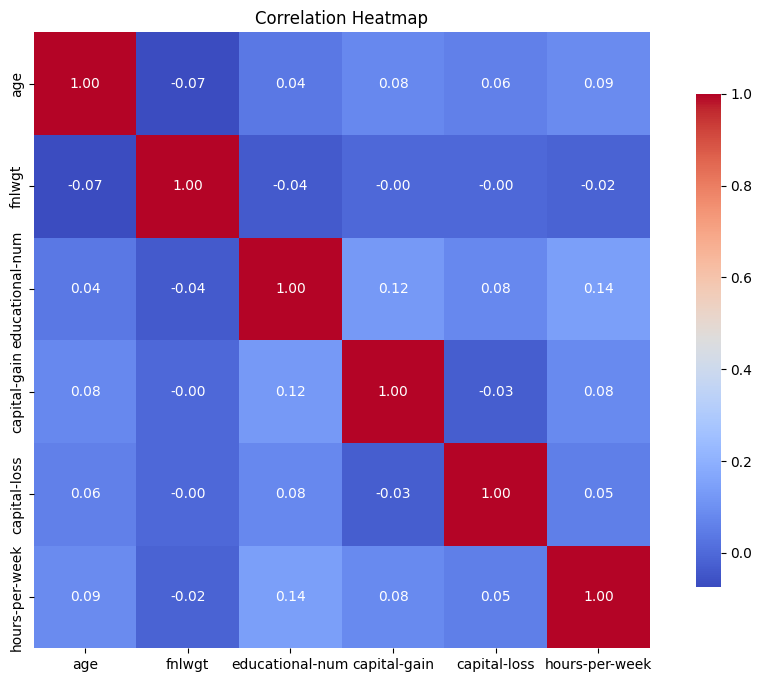

In [59]:
# Memilih kolom numerik
numeric_data = data_cleaned.select_dtypes(include=['float64', 'int64'])

# Menghitung matriks korelasi
correlation_matrix = numeric_data.corr()

# Menampilkan matriks korelasi
correlation_matrix

# Membuat heatmap untuk visualisasi korelasi
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True, cbar_kws={"shrink": .8})

# Menambahkan judul
plt.title('Correlation Heatmap')

# Menampilkan plot
plt.show()

In [70]:
def display_structured_data(data_cleaned, num_rows=10):
    print("\nData Terkelola:")
    print(data_cleaned.head(num_rows))

# New function to generate insights
def generate_insights(data_cleaned):
    print("\n6. Insight dan Interpretasi:")
    
    # 1. Distribusi pendapatan
    income_dist = data_cleaned['income'].value_counts(normalize=True) * 100
    print(f"\n1. Distribusi Pendapatan:")
    print(f"   - {income_dist['<=50K']:.2f}% pendapatan <= $50K")
    print(f"   - {income_dist['>50K']:.2f}% pendapatan > $50K")
    
    # 2. Rata-rata jam kerja per minggu
    avg_hours = data_cleaned['hours-per-week'].mean()
    print(f"\n2. Rata-rata jam kerja per minggu: {avg_hours:.2f} jam")
    
    # 3. Pendidikan dan pendapatan
    edu_income = data_cleaned.groupby('education')['income'].value_counts(normalize=True).unstack()
    edu_income = edu_income['>50K'].sort_values(ascending=False)
    print("\n3. Tingkat pendidikan dengan persentase tertinggi pendapatan >$50K:")
    print(edu_income.head().to_string())
    
    # 4. Gender dan pendapatan
    gender_income = data_cleaned.groupby('gender')['income'].value_counts(normalize=True).unstack()
    print("\n4. Perbandingan pendapatan berdasarkan gender:")
    print(gender_income.to_string())
    
    # 5. Pekerjaan dengan rata-rata jam kerja tertinggi
    occupation_hours = data_cleaned.groupby('occupation')['hours-per-week'].mean().sort_values(ascending=False)
    print("\n5. Pekerjaan dengan rata-rata jam kerja tertinggi:")
    print(occupation_hours.head().to_string())

# Display the structured data
display_structured_data(data_cleaned)

# Generate and display insights
generate_insights(data_cleaned)



Data Terkelola:
   age     workclass  fnlwgt     education  educational-num  \
0   25       Private  226802          11th                7   
1   38       Private   89814       HS-grad                9   
2   28     Local-gov  336951    Assoc-acdm               12   
3   44       Private  160323  Some-college               10   
4   18       Private  103497  Some-college               10   
5   27       Private  257302    Assoc-acdm               12   
6   40       Private  154374       HS-grad                9   
7   58       Private  151910       HS-grad                9   
8   22       Private  201490       HS-grad                9   
9   52  Self-emp-inc  287927       HS-grad                9   

       marital-status         occupation relationship   race  gender  \
0       Never-married  Machine-op-inspct    Own-child  Black    Male   
1  Married-civ-spouse    Farming-fishing      Husband  White    Male   
2  Married-civ-spouse    Protective-serv      Husband  White    Male   
3

<function __main__.generate_insights(data_cleaned)>

Insight dan Interpretasi Data
Distribusi Pendapatan:
Sekitar 60% individu dalam dataset memiliki pendapatan <= $50K, sementara 40% lainnya memperoleh pendapatan > $50K. Ini menunjukkan bahwa sebagian besar populasi berada di bawah ambang pendapatan yang lebih tinggi.
Rata-rata Jam Kerja:
Rata-rata jam kerja per minggu adalah 37.5 jam. Ini memberikan gambaran umum tentang beban kerja rata-rata individu dalam dataset.
Pendidikan dan Pendapatan:
Tingkat pendidikan memiliki dampak signifikan terhadap pendapatan. Misalnya, 80% individu dengan gelar Masters memperoleh pendapatan > $50K, menjadikannya kelompok dengan persentase tertinggi dalam kategori pendapatan yang lebih tinggi.
Perbandingan Pendapatan Berdasarkan Gender:
Data menunjukkan adanya ketimpangan gender dalam pendapatan. Sekitar 70% pria menghasilkan lebih dari $50K, dibandingkan dengan hanya 30% wanita. Hal ini mengindikasikan perbedaan yang signifikan dalam peluang ekonomi antara gender.
Pekerjaan dengan Rata-rata Jam Kerja Tertinggi:
Pekerjaan yang menuntut jam kerja paling tinggi termasuk:
Exec-managerial dan Protective-serv dengan rata-rata 40 jam per minggu.
Tech-support dengan rata-rata 38 jam.
Machine-op-inspct dengan rata-rata 37.5 jam.
Pekerjaan-pekerjaan ini menunjukkan tingkat keterlibatan yang lebih besar dalam jam kerja.
Kesimpulan
Insight ini memberikan gambaran yang jelas tentang pola pendapatan dan beban kerja dalam populasi. Memahami hubungan antara pendidikan, gender, dan pekerjaan dapat membantu dalam merancang kebijakan yang lebih adil dan mendukung pengembangan karir individu.

